Logical error rate: 0.0467
R 0 1 2
DEPOLARIZE1(0.02) 0 1 2
CX 0 1
DEPOLARIZE2(0.02) 0 1
CX 2 1
DEPOLARIZE2(0.02) 2 1
M 1
DETECTOR rec[-1]
M 0 2
OBSERVABLE_INCLUDE(0) rec[-2] rec[-1]


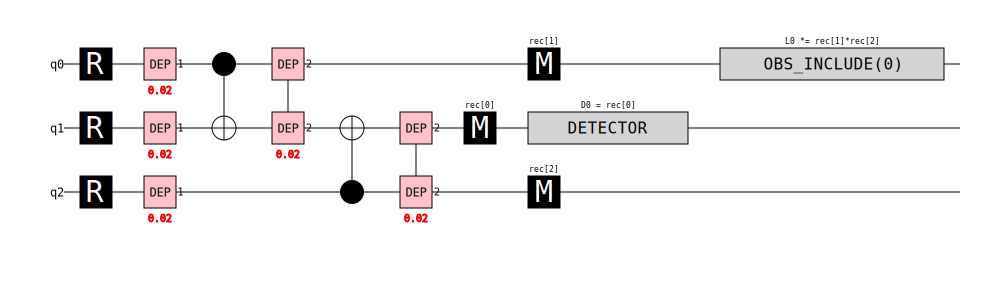

In [45]:
import stim
import pymatching as pm
import numpy as np
from IPython.display import SVG

# Small repetition code circuit with noise
circuit = stim.Circuit('''
R 0 1 2
DEPOLARIZE1(0.02) 0 1 2
CNOT 0 1
DEPOLARIZE2(0.02) 0 1
CNOT 2 1
DEPOLARIZE2(0.02) 2 1
M 1
DETECTOR rec[-1]
M 0 2
OBSERVABLE_INCLUDE(0) rec[-2] rec[-1]
''')

# Detector Error Model
dem = circuit.detector_error_model()
matcher = pm.Matching.from_detector_error_model(dem)

# Sample shots
sampler = circuit.compile_detector_sampler()
dets, obs = sampler.sample(10000, separate_observables=True)

# Decode
pred = matcher.decode_batch(dets).reshape(-1, 1)
p_L = np.count_nonzero(pred ^ obs) / len(pred)
print("Logical error rate:", p_L)

print(circuit)
SVG(str(circuit.diagram("timeline")))

